<a href="https://colab.research.google.com/github/intansk/retail-sales/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Tren Penjualan Produk Berdasarkan Pola Pembelian Pelanggan**

#**Import Library**

In [384]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis pola pembelian yang dilakukan oleh pelanggan sehingga dapat mengetahui tren penjualan yang terjadi guna memahami preferensi pelanggan dan mengembangkan stategi bisnis yang lebih baik.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini yaitu persaingan yang semakin ketat sehingga dibutuhkan analisis tren penjualan agar dapat membuat strategi bisnis yang baik.

##**Data Mining Goals**

Tujuan dari data mining pada dataset ini adalah untuk memprediksi tren penjualan yang terjadi agar dapat bersaing dengan kompetitor lain berdasarkan analisis pola pembelian pelanggan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data dari sumber yang tersedia. Kemudian, data-data tersebut dijelaskan dan didentifikasi faktor-faktor yang dapat menjadi pola pembelian pelanggan. Selanjutnya, mengetahui hubungan antar faktor-faktor tersebut dan diidentifkasi agar dapat diatasi pada tahapan selanjutnya.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset yang digunakan untuk melakukan analisis ini adalah dataset yang berjudul "Retail Sales Dataset" yang diambil dari website Kaggle. Dataset ini berisi tentang data penjualan eceran yang didalamnya terdapat data pelanggan, data transaksi dan juga data barang yang dibeli.

Sumber: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

In [385]:
df = pd.read_csv('https://raw.githubusercontent.com/intansk/retail-sales/main/data.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


##**Describe Data**

####Informasi Dasar

In [386]:
df.shape

(1000, 9)

Pada dataset tersebut terdiri dari 1000 baris dan 9 kolom

####Informasi Lanjutan

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Sesuai pada penjelasan sebelumnya, jumlah kolom pada dataset yang digunakan adalah sebanyak 9 kolom yang diantaranya berisi:


1. **Transaction ID (ID Transaksi);** kode unik yang digunakan untuk mengidentifikasi suatu transaksi yang dilakukan. Bertipe data integer
2. **Date (Tanggal);** tanggal terjadinya transaksi. Bertipe data object
3. **Customer ID (ID Pelanggan);** kode unik yang dimiliki setiap pelanggan. Bertipe data object
4. **Gender (Jenis Kelamin);** jenis kelamin pelanggan (perempuan/laki-laki). Bertipe data object
5. **Age (Usia);** usia pelanggan. Bertipe data integer
6. **Product Category (Kategori Produk);** kategori produk yang dibeli. Bertipe data object
7. **Quantity (Kuantitas);** jumlah barang atau unit yang dibeli. Bertipe data integer
8. **Price per Unit (Harga per Unit);** harga per satu barang. Bertipe data integer
9. **Total Amount (Total harga);** total harga dari barang yang dibeli. Bertipe data integer

####Informasi Statistik Deskriptif

In [388]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Berdasarkan data diatas, didapatkan hasil dari perhitungan statistika deskriptif sebagai berikut:
1.   **Transaction ID (ID Transaksi);** rata-rata dari ID transaksi yang dilakukan adalah sebanyak 500,5 dengan standar devisiasi sebesar 288,819. Nilai kuartil pertama dari ID transaksi ini adalah 250.75 dan nilai dari kuartil ketiga adalah 750.25. Untuk rentangannya dimulai dari 1 hingga 750
2.   **Age (Usia);** rata-rata dari usia pembeli adalah 41 tahun dengan standar devisiasi sebesar 13.681. Nilai kuartil pertama dari usia pembeli adalah 29 tahun dan nilai dari kuartil ketiga adalah 53 tahun. Untuk rentangannya dimulai dari 18-64 tahun
3. **Quantity (Kuantitas);** rata-rata dari kuantitas barang yang dibeli oleh para pelanggan adalah 2 hingga 3 barang dengan standar devisiasi sebesar 1.132. Nilai kuartil pertama dari kuantitas pembelian barang adalah 1 dan nilai dari kuartil ketiganya adalah 4. Untuk rentangan jumlah barang yang dibeli mulai dari 1 hingga 4 barang
4. **Price per Unit (Harga per Unit);** rata-rata dari harga barang per satuannya adalah sebesar Rp179.890 dengan standar devisiasi sebesar 189.681. Nilai kuartil pertama nya adalah Rp30.000 dan nilai dari kuartil ketiganya adalah Rp50.000. Untuk rentang harga barang dimulai dari Rp25.000 hingga Rp500.000
5. **Total Amount (Total Harga);** rata-rata dari total pembelian yang dilakukan adalah Rp456.600 dengan standar devisiasi sebesar Rp599.997. Nilai dari kuartil pertamanya adalah Rp60.000 dan nilai dari kuartil ketiganya adalah Rp900.000. Untuk rentangannya dimulai dari Rp25.000 hingga Rp2.000.000


##**Exploratory Data Analysis**

<Axes: ylabel='Gender'>

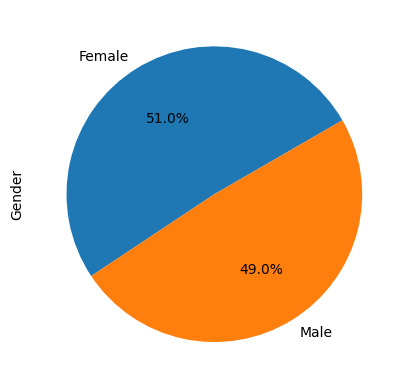

In [389]:
# Berapa persentase perbandingan pelanggan perempuan dan laki-laki?
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=30)

Berdasarkan visualisasi pie chart di atas, maka dapat disimpulkan bahwa pembeli lebih banyak berasal dari perempuan yaitu sebesar 51%, sementara pembeli laki-laki sebesar 49%

<ipython-input-390-7165c067c094>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Jumlah Peminat')

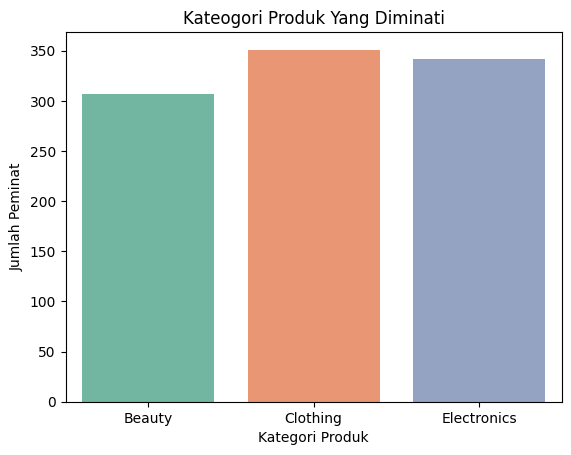

In [390]:
# Dari kategori produk yang dijual, produk apa yang paling diminati?
sns.countplot(x='Product Category', data=df, palette='Set2')
plt.title('Kateogori Produk Yang Diminati')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Peminat')

Dapat dilihat dari ketiga kategori produk yang ada (Beauty, Clothing dan Electronics), kategori yang paling diminati adalah kategori Clothing

<Axes: xlabel='Product Category', ylabel='Count'>

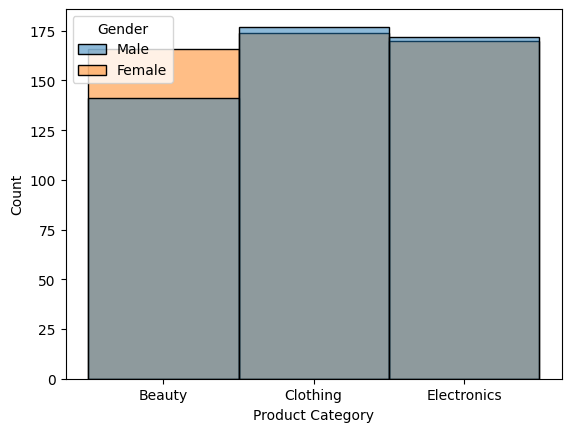

In [391]:
# Produk apa yang paling diminati oleh pelanggan perempuan dan laki-laki?
sns.histplot(data=df, x='Product Category', hue='Gender')

Berdasarkan data diatas dapat disimpulkan bahwa pembeli perempuan lebih banyak membeli barang dengan kategori Beauty (kecantikan), sedangkan untuk pembeli laki-laki lebih banyak membeli barang dengan kategori Clothing (pakaian) dan Electronics(elektronik).

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

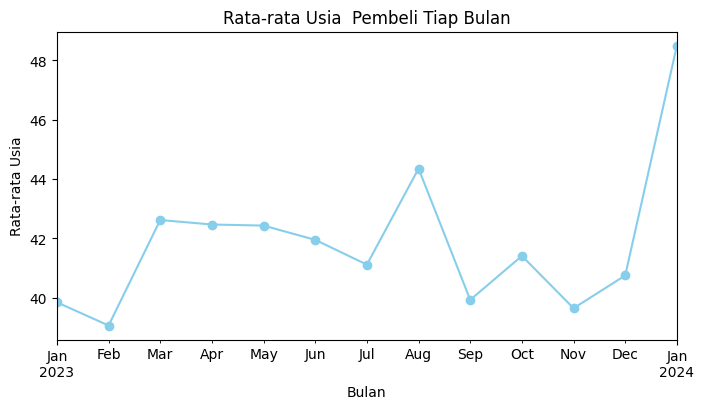

In [392]:
# Bagaimana rata-rata usia pembeli seiap bulan?
plt.figure(figsize=(8, 4))
df['Date'] = pd.to_datetime(df['Date'])
monthly_age = df.groupby(df['Date'].dt.to_period('M'))['Age'].mean()
monthly_age.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Usia')
plt.title('Rata-rata Usia  Pembeli Tiap Bulan')
plt

Berdasarkan data di atas, dapat dilihat tren penjualan selama satu tahun yang dimulai dari bulan Januari 2023 hingga Januari 2024. Terlihat bahwa pada bulan Januari 2024 terjadi peningkatan pembelian untuk rata-rata usia di atas 48 tahun, sementara untuk jumlah pembelian terendah terjadi pada bulan Februari 2023, dengan rata-rata usia pembeli di bawah 40 tahun.

In [393]:
px.imshow(df.corr(numeric_only=True))

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa:
*   Korelasi antara 'Age' dan 'Quantity' sebesar -0.023 yang berarti kedua variabel tersebut tidak memiliki korelasi
*   Korelasi antara 'Age' dan 'Price per Unit' sebesar -0.038 yang berarti kedua variabel tersebut tidak memiliki korelasi
*   Korelasi antara 'Quantity' dan 'Total Amount' sebesar 0.373 yang berarti kedua variabel tersebut memiliki korelasi


##**Verify Data Quality**

####Missing Values

In [394]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Transaction ID,0.0
Date,0.0
Customer ID,0.0
Gender,0.0
Age,0.0
Product Category,0.0
Quantity,0.0
Price per Unit,0.0
Total Amount,0.0


Dapat dilihat dari tabel di atas bahwa dalam dataset yang digunakan, tidak ada nilai yang kosong.

####Outliers Values

<Axes: xlabel='Total Amount'>

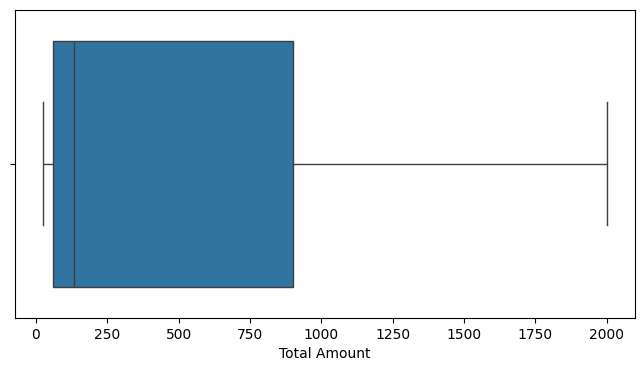

In [395]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Total Amount'])

Pada dataset yang digunakan tidak terdapat outlier

####Duplicated Values

In [396]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Dari data di atas, dapat disimpulkan bahwa pada dataset tersebut tidak terdapat nilai yang duplikat

# **DATA PREPARATION**

## **Data Cleaning**

####**Penanganan Missing Values**

In [397]:
print((df.isna().sum() / len(df)) * 100)

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64


Berdasarkan data di atas, terlihat bahwa tidak terdapat nilai yang kosong atau missing value dalam data tersebut. Sehingga, dapat dilanjutkan ke tahap selanjutnya tanpa perlu melakukan penanganan missing value lebih lanjut.

#### **Penanganan Duplicated Values**

In [398]:
df[df.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


Berdasarkan data di atas, dapat disimpulkan bahwa tidak ada nilai yang duplikat pada dataset yang digunakan.

#### **Penanganan Outliers**

In [410]:
results = []
cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)
display(results_df)

Kolom,Persentase Outliers
Gender,0.0
Age,0.0
Quantity,0.0
Price per Unit,0.0
Total Amount,0.0
Age Category,0.0


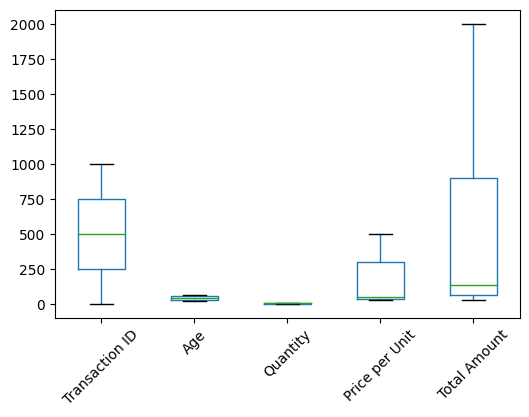

In [400]:
boxplot = df.boxplot(grid=False, rot=45, showfliers=True, figsize=(6, 4))

Dari hasil pengecekan outliers dan hasil visualisasi yang dilakukan, dapat disimpulkan bahwa tidak ada data outliers dalam dataset yang digunakan.

#### **Penanganan Inconsistent Values / Noise**

In [401]:
[print(f"Kolom -> {col}\n{df[col].unique()}\n{'=' * 30}\n") for col in df.columns]

Kolom -> Transaction ID
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  1

[None, None, None, None, None, None, None, None, None]

Berdasarkan data tersebut, dapat dilihat bahwa setiap kolom yang terisi sesuai dengan nilai yang seharusnya, sehingga dapat disimpulkan bahwa tidak terdapat nilai yang tidak konsisten atau noise dalam dataset tersebut.

## **Construct Data**

#### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [402]:
def categorize_age(Age):
  if 12 <= Age < 25:
    return 'Teenagers'
  elif 26 <= Age < 45:
    return 'Adult'
  else:
    return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

#### **Pengecekan Hasil**

In [403]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Category
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adult
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Adult
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Elderly
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adult
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adult


Pada tahap ini dilakukan rekayasa fitur pada kolom Age atau usia dengan menambahkan kolom baru yang diberi nama Age Category. Pada kolom tersebut akan dilakukan pengkategorian usia yang dimana untuk usia 12-25 tahun akan diberi label Teenager, usia 26-45 tahun diberi label Adult dan usia 45 tahun ke atas akan dibeli label Elderly.

## **Data Reduction**

#### **Mengurangi Fitur -Fitur Yang Kurang Relevan**

In [404]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr, color_continuous_scale='YlGnBu_r')

In [405]:
df = df.drop(['Transaction ID', 'Customer ID'], axis=1)

#### **Pengecekkan Hasil**

In [406]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Category
0,2023-11-24,Male,34,Beauty,3,50,150,Adult
1,2023-02-27,Female,26,Clothing,2,500,1000,Adult
2,2023-01-13,Male,50,Electronics,1,30,30,Elderly
3,2023-05-21,Male,37,Clothing,1,500,500,Adult
4,2023-05-06,Male,30,Beauty,2,50,100,Adult


Dapat dilihat dari hasil korelasi di atas, kolom Transaction ID kurang relevan dengan apa yang akan dianalisis, yaitu tren penjualan. Sehingga kolom tersebut akan dihapus. Selanjutnya, kolom Customer ID juga akan dihapus karena tidak relevan dengan tujuan dari analisis yang dilakukan.

## **Data Transformation**

#### **Mapping**

In [407]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Age Category'] = df['Age Category'].map({'Teenagers': 1,'Adult': 2, 'Elderly': 3}).astype(int)

df

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Category
0,2023-11-24,0,34,Beauty,3,50,150,2
1,2023-02-27,1,26,Clothing,2,500,1000,2
2,2023-01-13,0,50,Electronics,1,30,30,3
3,2023-05-21,0,37,Clothing,1,500,500,2
4,2023-05-06,0,30,Beauty,2,50,100,2
...,...,...,...,...,...,...,...,...
995,2023-05-16,0,62,Clothing,1,50,50,3
996,2023-11-17,0,52,Beauty,3,30,90,3
997,2023-10-29,1,23,Beauty,4,25,100,1
998,2023-12-05,1,36,Electronics,3,50,150,2


Pada tahap ini, dilakukan mapping untuk kolom Gender dan Age Category. Pada kolom Gender dilakukan perubahan nilai dengan mengubah nilai Male dan Female menjadi 0 dan 1, yang dimana nilai Male akan berubah menjadi 0 dan nilai Female akan berubah menjadi 1. Selanjutnya, juga dilakukan perubahan nilai pada kolom Age Category untuk mengelompokkan usia berdasarkan suatu kategori, pada kolom ini akan dibagi menjadi 3 kategori yaitu 1 untuk Teenagers, 2 untuk Adult dan 3 untuk Elderly.

#### **Encoding**

In [408]:
df = pd.get_dummies(df)

#### **Pengecekan Hasil**

In [409]:
df.head()

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Age Category,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,2023-11-24,0,34,3,50,150,2,1,0,0
1,2023-02-27,1,26,2,500,1000,2,0,1,0
2,2023-01-13,0,50,1,30,30,3,0,0,1
3,2023-05-21,0,37,1,500,500,2,0,1,0
4,2023-05-06,0,30,2,50,100,2,1,0,0


Pada tahap ini, dilakukan proses one-hot encoding pada kolom Product Category. One-hot encoding ini bertujuan untuk mengubah data kategorikal menjadi nilai numerik. Dapat dilihat setelah dilakukan encoding, setiap kategori produk memiliki kolomnya tersendiri dan nilai 0 dan 1 menunjukkan apakah produk tersebut dibeli atau tidak oleh pembeli pada satu transaksi.

In [412]:
df.to_csv('Data_Cleaned.csv', index=False)
df

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Age Category,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,2023-11-24,0,34,3,50,150,2,1,0,0
1,2023-02-27,1,26,2,500,1000,2,0,1,0
2,2023-01-13,0,50,1,30,30,3,0,0,1
3,2023-05-21,0,37,1,500,500,2,0,1,0
4,2023-05-06,0,30,2,50,100,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,0,62,1,50,50,3,0,1,0
996,2023-11-17,0,52,3,30,90,3,1,0,0
997,2023-10-29,1,23,4,25,100,1,1,0,0
998,2023-12-05,1,36,3,50,150,2,0,0,1
